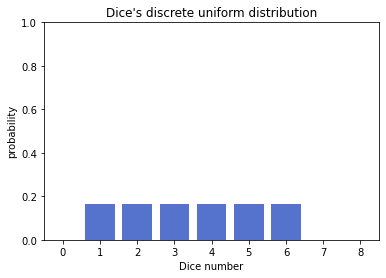

In [9]:
# 離散一様分布

# 離散変数Xが1,2,..,Kを等確率でとる。すなわち、
# P(X=1) = P(X=2) = ... = P(X=K)であるとき、
# Xの分布を離散一様分布とよぶ
# 期待値：(K+1)/2 分散：(K**2-1)/12 となる
# また積率母関数は、G(s) = E[s**x] = s*(1-s**k)/(K*(1-s))

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dice_df = pd.DataFrame(
    data={"probability":[0,1/6,1/6,1/6,1/6,1/6,1/6,0,0]}, 
    index=[0,1,2,3,4,5,6,7,8])
sns.barplot(data=dice_df, x=dice_df.index, y="probability", color='royalblue')
plt.title("Dice's discrete uniform distribution")
plt.xlabel("Dice number")
plt.ylim(0, 1)
plt.show()


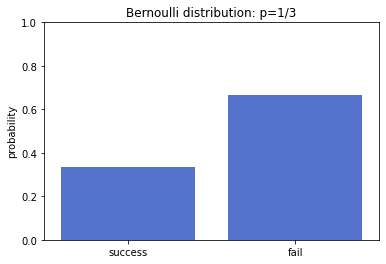

In [11]:
# ベルヌーイ分布

# 成功確率pのベルヌーイ試行に対し、確率変数Xを成功時1、失敗時0とおく
# Xが従う分布を成功確率pのベルヌーイ分布と呼び、Bin(1,p)と表す
# 期待値：p 分散：p*(1-p) となる
# また積率母関数は、G(s) = E[s**x] = ps+(1-p)

bernoulli_df = pd.DataFrame(
    data={"probability":[1/3,2/3]}, 
    index=["success", "fail"])
sns.barplot(data=bernoulli_df, x=bernoulli_df.index, y="probability", color='royalblue')
plt.title("Bernoulli distribution: p=1/3")
plt.ylim(0, 1)
plt.show()

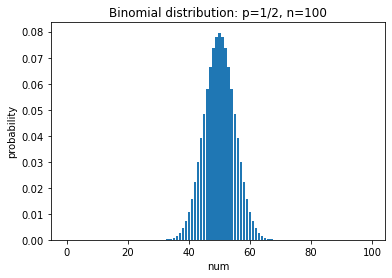

In [20]:
# 二項分布

# 成功確率pのベルヌーイ試行をn回行いi(1<=i<=n)回目の
# ベルヌーイ試行に対応する確率変数をXiとする
# X1,..,Xnが独立なとき、Y=X1+..+Xnが従う分布を成功確率の二項分布とよび、Bin(1,p)と表す
# つまり、独立なベルヌーイ試行をn回行った時の成功回数の分布のことをいう「
# 期待値：n*p 分散：n*p*(1-p) となる
# また積率母関数は、G(s) = E[s**Y] = (ps+(1-p))**n

from scipy.stats import binom

n = 100
p = 1/2
x = range(n)
f = binom(n, p)
y = f.pmf(x)
plt.title("Binomial distribution: p=1/2, n=100")
plt.ylabel("probability")
plt.xlabel("num")
plt.bar(x, y)
plt.show()

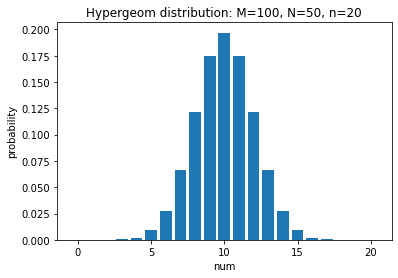

In [24]:
# 超幾何分布

# 壺の中にN個の球が入っており、そのうちM個が赤玉でN個数がN-M個が白玉である
# ここからn個の球を取り出すとき、その中の赤玉の個数をYとする
# このYについて、非復元抽出の場合の分布を超幾何分布よとよび、HG(N,M, n)と表す
# 期待値：n*M/N 分散：n*M/N*(1-M/N)*(M-N)/(N-1) となる

import numpy as np
from scipy.stats import hypergeom

[M, N, n] = [100, 50, 20]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
y = rv.pmf(x)
plt.title("Hypergeom distribution: M=100, N=50, n=20")
plt.ylabel("probability")
plt.xlabel("num")
plt.bar(x, y)
plt.show()

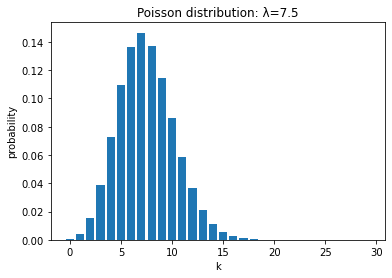

In [42]:
# ポアソン分布

# 単位時間あたりに平均λ回起こる事象がk回起こる確率を表す確率分布
# 期待値：λ 分散：λ となる
# また積率母関数は、G(s) = E[s**Y] = e**(λ*(s-1))

from scipy.stats import poisson

lmd = 7.5 # 1か月あたりの平均交通故発生日数
n = 30 # 1か月
x = range(n)
y = poisson.pmf(x, lmd)
plt.title(f"Poisson distribution: λ={lmd}")
plt.ylabel("probability")
plt.xlabel("k")
plt.bar(x, y)
plt.show()

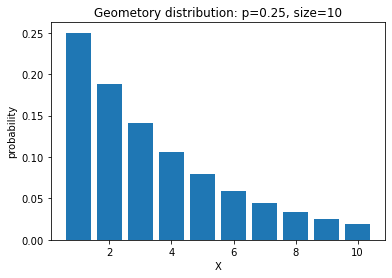

In [54]:
# 幾何分布

# 成功確率pのベルヌーイ試行を繰り返したとき、
# はじめて成功するまでに発生する失敗回数をXとする
# このときのXの分布を幾何分布とよび、Geo(p)とあらわす
# 期待値：(1-p)/p 分散：(1-p)/p**2 となる
# また積率母関数は、G(s) = E[s**X] = p/(1-(1-p)*s)

from scipy.stats import geom

p = 1/4
n = 10
x = range(1, n+1)
y = geom.pmf(k=x, p=p)
plt.title(f"Geometory distribution: p={p}, size={n}")
plt.ylabel("probability")
plt.xlabel("X")
plt.bar(x, y)
plt.show()

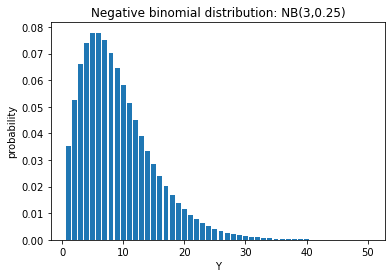

In [62]:
# 負の二項分布

# 成功確率pのベルヌーイ試行を繰り返したとき、
# r回目の成功が発生した時点でそれまでに発生した失敗回数をYとする
# このときのYの分布を負の二項分布とよび、NB(r, p)とあらわす
# なお、NB(1, p)は幾何分布である
# 期待値：r*(1-p)/p 分散：r*(1-p)/p**2 となる

from scipy.stats import nbinom

p = 1/4
r = 3
n = 50
x = range(1, n+1)
y = nbinom.pmf(x, r, p)
plt.title(f"Negative binomial distribution: NB({r},{p})")
plt.ylabel("probability")
plt.xlabel("Y")
plt.bar(x, y)
plt.show()

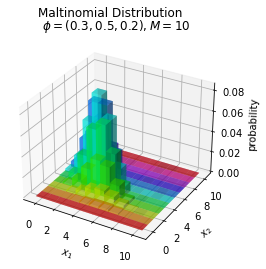

In [78]:
# 多項分布

# K(=>2)個の結果、1~Kのいずれか一つが起こる試行を考える
# 結果j(1<=j<=k)が起こる確率をpjとする
# この試行を独立にn回行うとき、結果jが起こる回数をYとする
# このときにYが従う分布を多項分布と呼ぶ

from scipy.stats import multinomial

M = 10
phi_v = np.array([0.3, 0.5, 0.2])

x_vals = np.arange(M + 1)
X1, X2 = np.meshgrid(x_vals, x_vals)

x1_vals = X1.flatten()
x2_vals = X2.flatten()
x3_vals = np.where(x1_vals+x2_vals <= M, M-(x1_vals+x2_vals), 0.0)

x_points = np.stack([x1_vals, x2_vals, x3_vals], axis=1)

probability = multinomial.pmf(x=x_points, n=M, p=phi_v)

cm = plt.get_cmap('hsv')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.bar3d(x=x1_vals-0.5, y=x2_vals-0.5, z=np.zeros_like(x1_vals), 
         dx=1.0, dy=1.0, dz=probability, 
         color=cm(x2_vals / M), alpha=0.5, shade=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution')
ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in phi_v]) + '), M=' + str(M) + '$')
plt.show()